In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import missingno
%matplotlib inline
import IPython
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
import warnings
# import pyplot as plt
sns.set(style="whitegrid") # set the background for the graphs

In [2]:
df = pd.read_csv('shootings_datset.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [3]:
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

In [4]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


In [5]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")

In [6]:
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

In [7]:
def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    print("Preview of data:")
    display(df.head(3))    
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")
        
    # Drop duplicated entries if true
    df.drop_duplicates(inplace=True)

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

Preview of data:


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 


,count,mean,std,min,25%,50%,75%,max
id,4895.0,2902.148519,1683.467910,3.0,1441.5,2847.0,4352.5,5925.0
age,4895.0,36.549750,12.694348,6.0,27.0,35.0,45.0,91.0


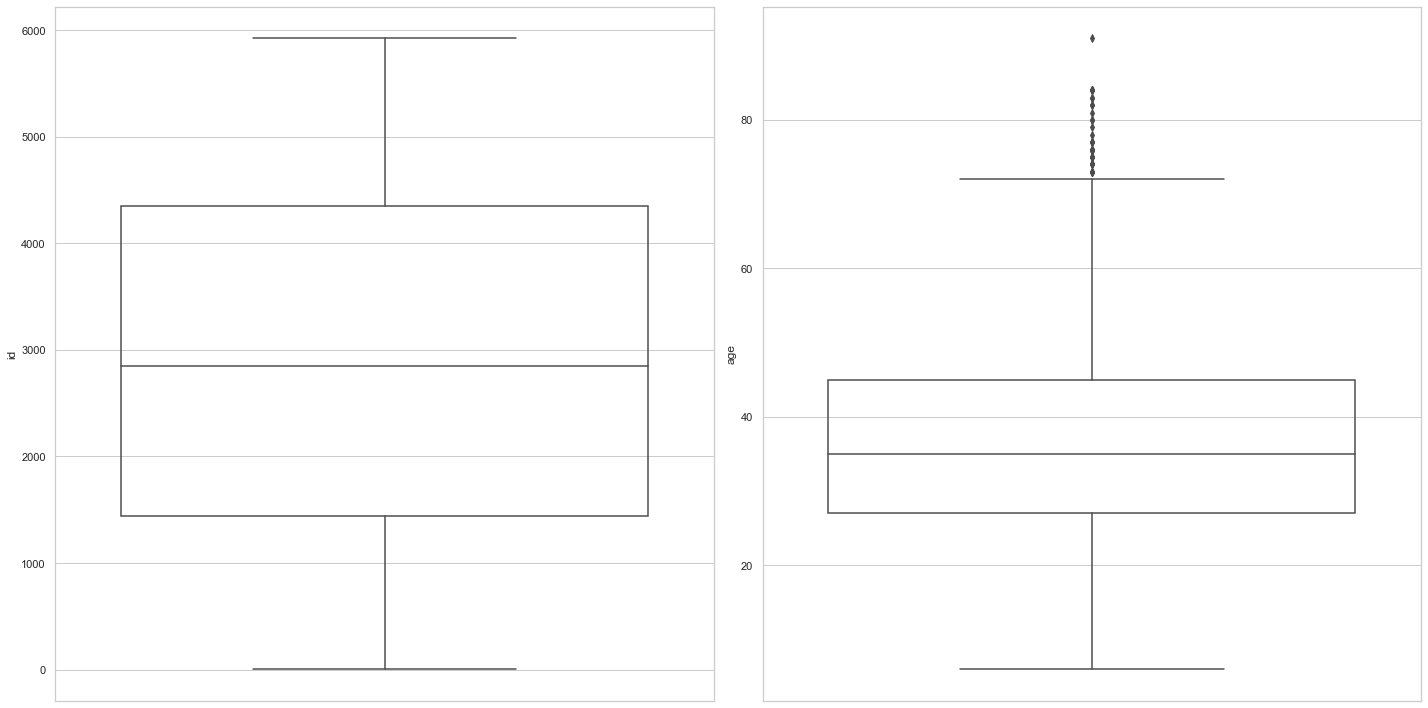


To check pairwise joint distribution of numeric data


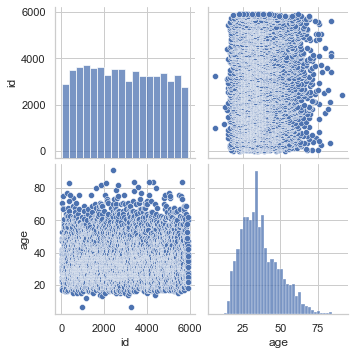


To check time series of numeric data  by daily, monthly and yearly frequency


In [8]:
eda(df)

In [9]:
# separating x and y
x = df.drop('name', axis = 1)
y = df['name']
x

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [10]:
#print the data dtypes of each column
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [11]:
#change the object to categories data 
df.name= df['name'].astype('category')
df.manner_of_death = df['manner_of_death'].astype('category')
df.armed = df['armed'].astype('category')
df.gender = df['gender'].astype('category')
df.race=df['race'].astype('category')
df.city=df['city'].astype('category')
df.state=df['state'].astype('category')
df.threat_level=df['threat_level'].astype('category')
df.flee=df['flee'].astype('category')
df.arms_category=df['arms_category'].astype('category')

In [12]:
#change the age value to an integer because no one has a floating age
df.age = pd.Series(data=df.age, dtype='int')

In [13]:
#show empty columns fields
df.isnull()
#summerize
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [14]:
#show the various data columns
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4895.0,2902.148519,1683.467910,3.0,1441.5,2847.0,4352.5,5925.0
age,4895.0,36.547702,12.694266,6.0,27.0,35.0,45.0,91.0


In [17]:
#value count of each data values
df.age.value_counts()
df.armed.value_counts()
df.city.value_counts()
df.state.value_counts()
df.manner_of_death.value_counts()
df.signs_of_mental_illness.value_counts()
df.threat_level.value_counts()
df.flee.value_counts()
df.body_camera.value_counts()
df.arms_category.value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

<AxesSubplot:title={'center':'Age with density'}, xlabel='age', ylabel='Density'>

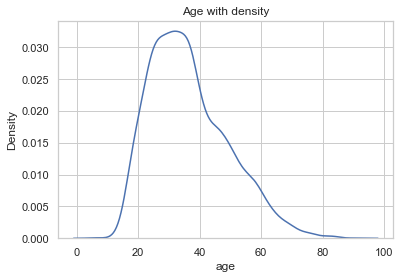

In [18]:
#plot the data values
plt.title('Age with density')
sns.kdeplot(data=df['age'])

<Figure size 720x1080 with 0 Axes>

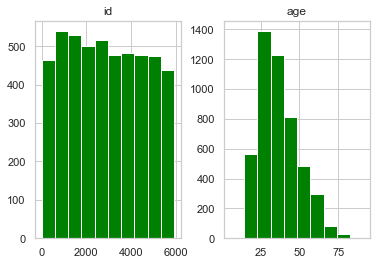

In [19]:
plt.figure(figsize=(10,15))
df.hist(bins=10,color='green')
plt.show()

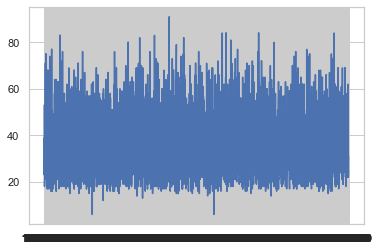

In [20]:
#show the age and date of indicence 
plt.plot_date(data=df,x='date',y='age',fmt='b')

<Figure size 720x720 with 0 Axes>

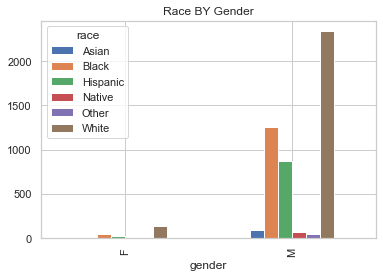

In [21]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['gender'],df['race'] )
#print(prd_gender)
ax=prd_gender.plot(kind='bar')
plt.title("Race BY Gender")
plt.legend
plt.show()

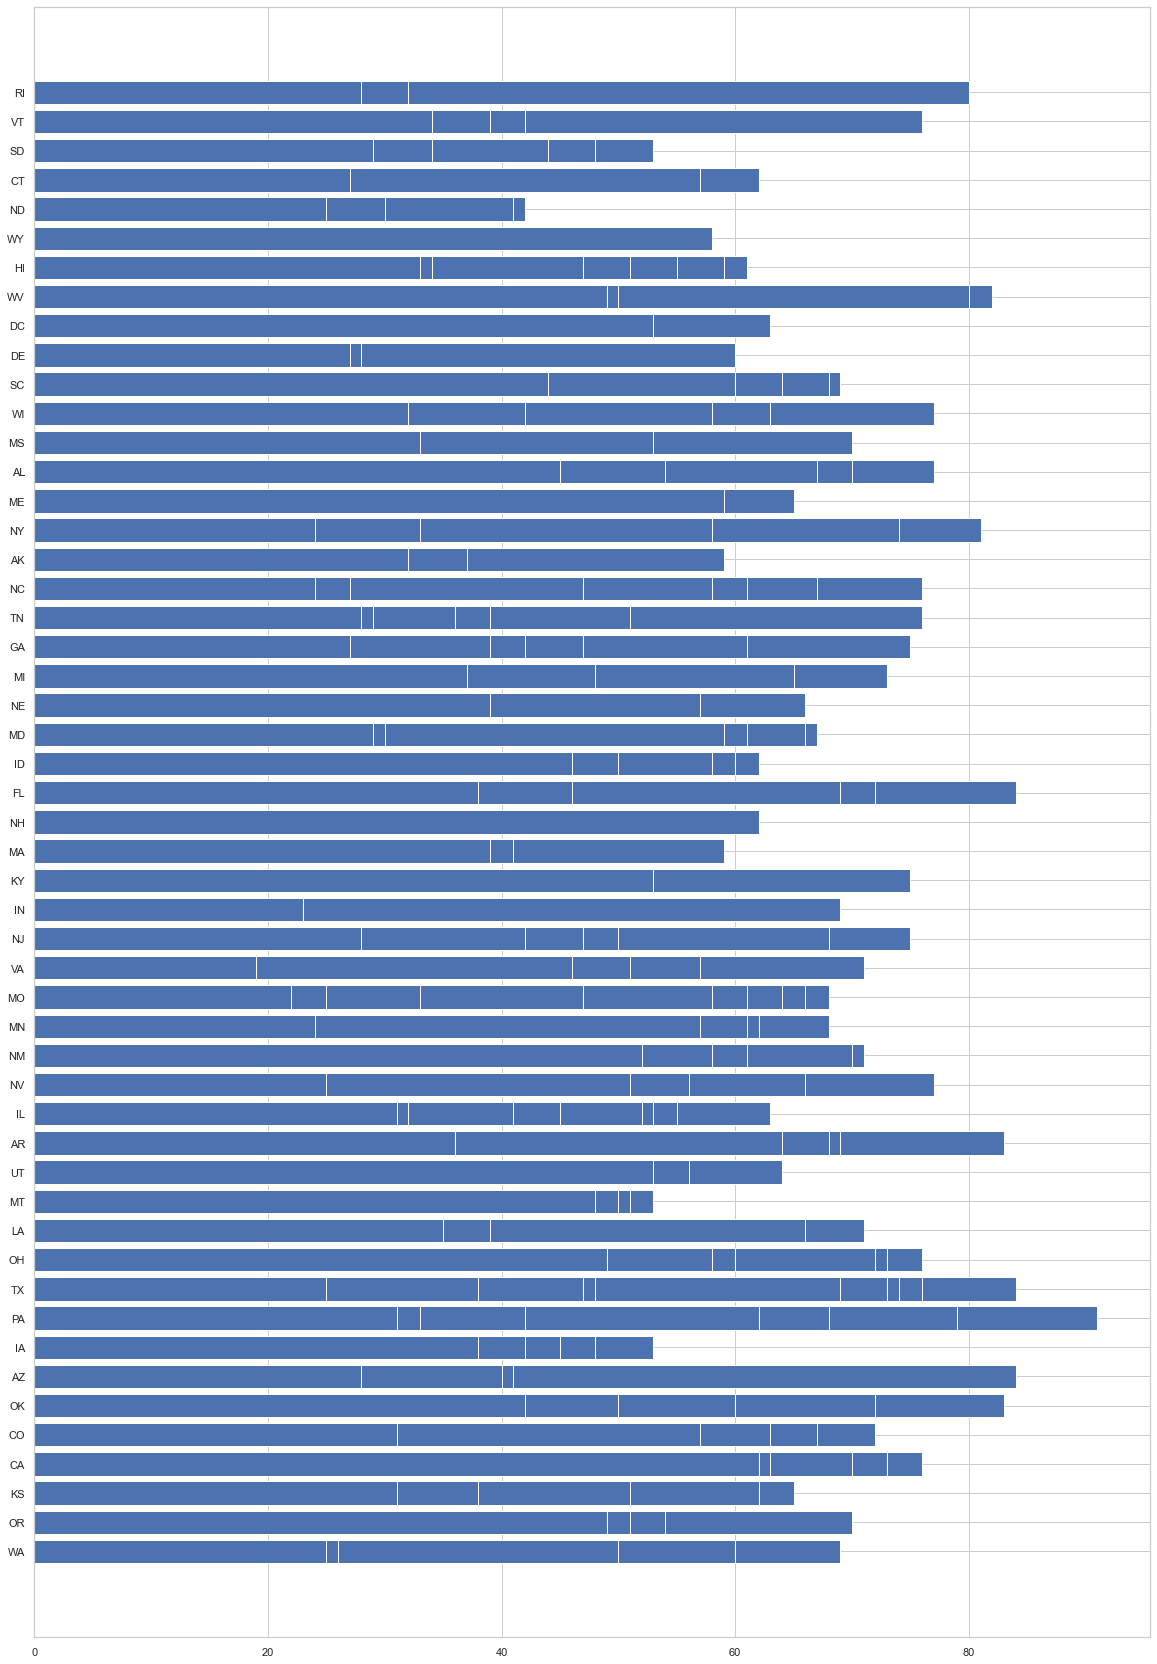

In [22]:
plt.figure(figsize=(20,30))
plt.barh(df['state'],df['age'])
plt.show()

Text(0.5, 1.0, 'Race BY Gender')

<Figure size 720x720 with 0 Axes>

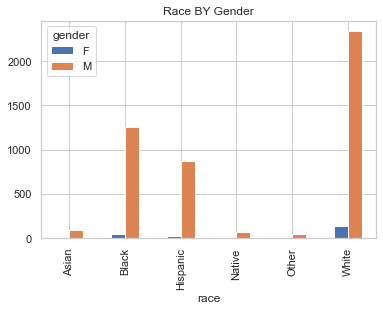

In [23]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['race'],df['gender'] )
#print(prd_gender)
ax=prd_gender.plot(kind='bar')
plt.title("Race BY Gender")

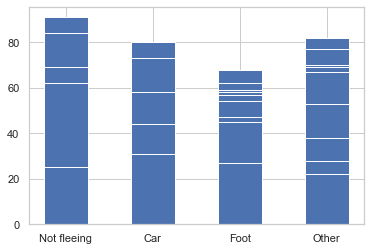

In [24]:
plt.bar(df['flee'],df['age'],width=0.5)
plt.show()

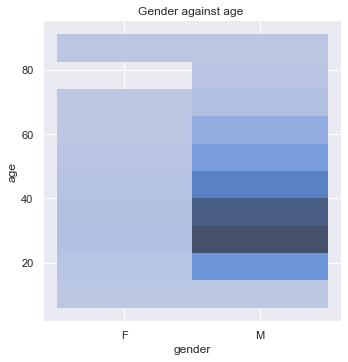

In [25]:
sns.set(style='darkgrid')
sns.displot(x=df['gender'],y=df['age'],bins=10,)
plt.title("Gender against age ")
plt.xlabel=("Gender")
plt.ylabel=('Age')

<BarContainer object of 4895 artists>

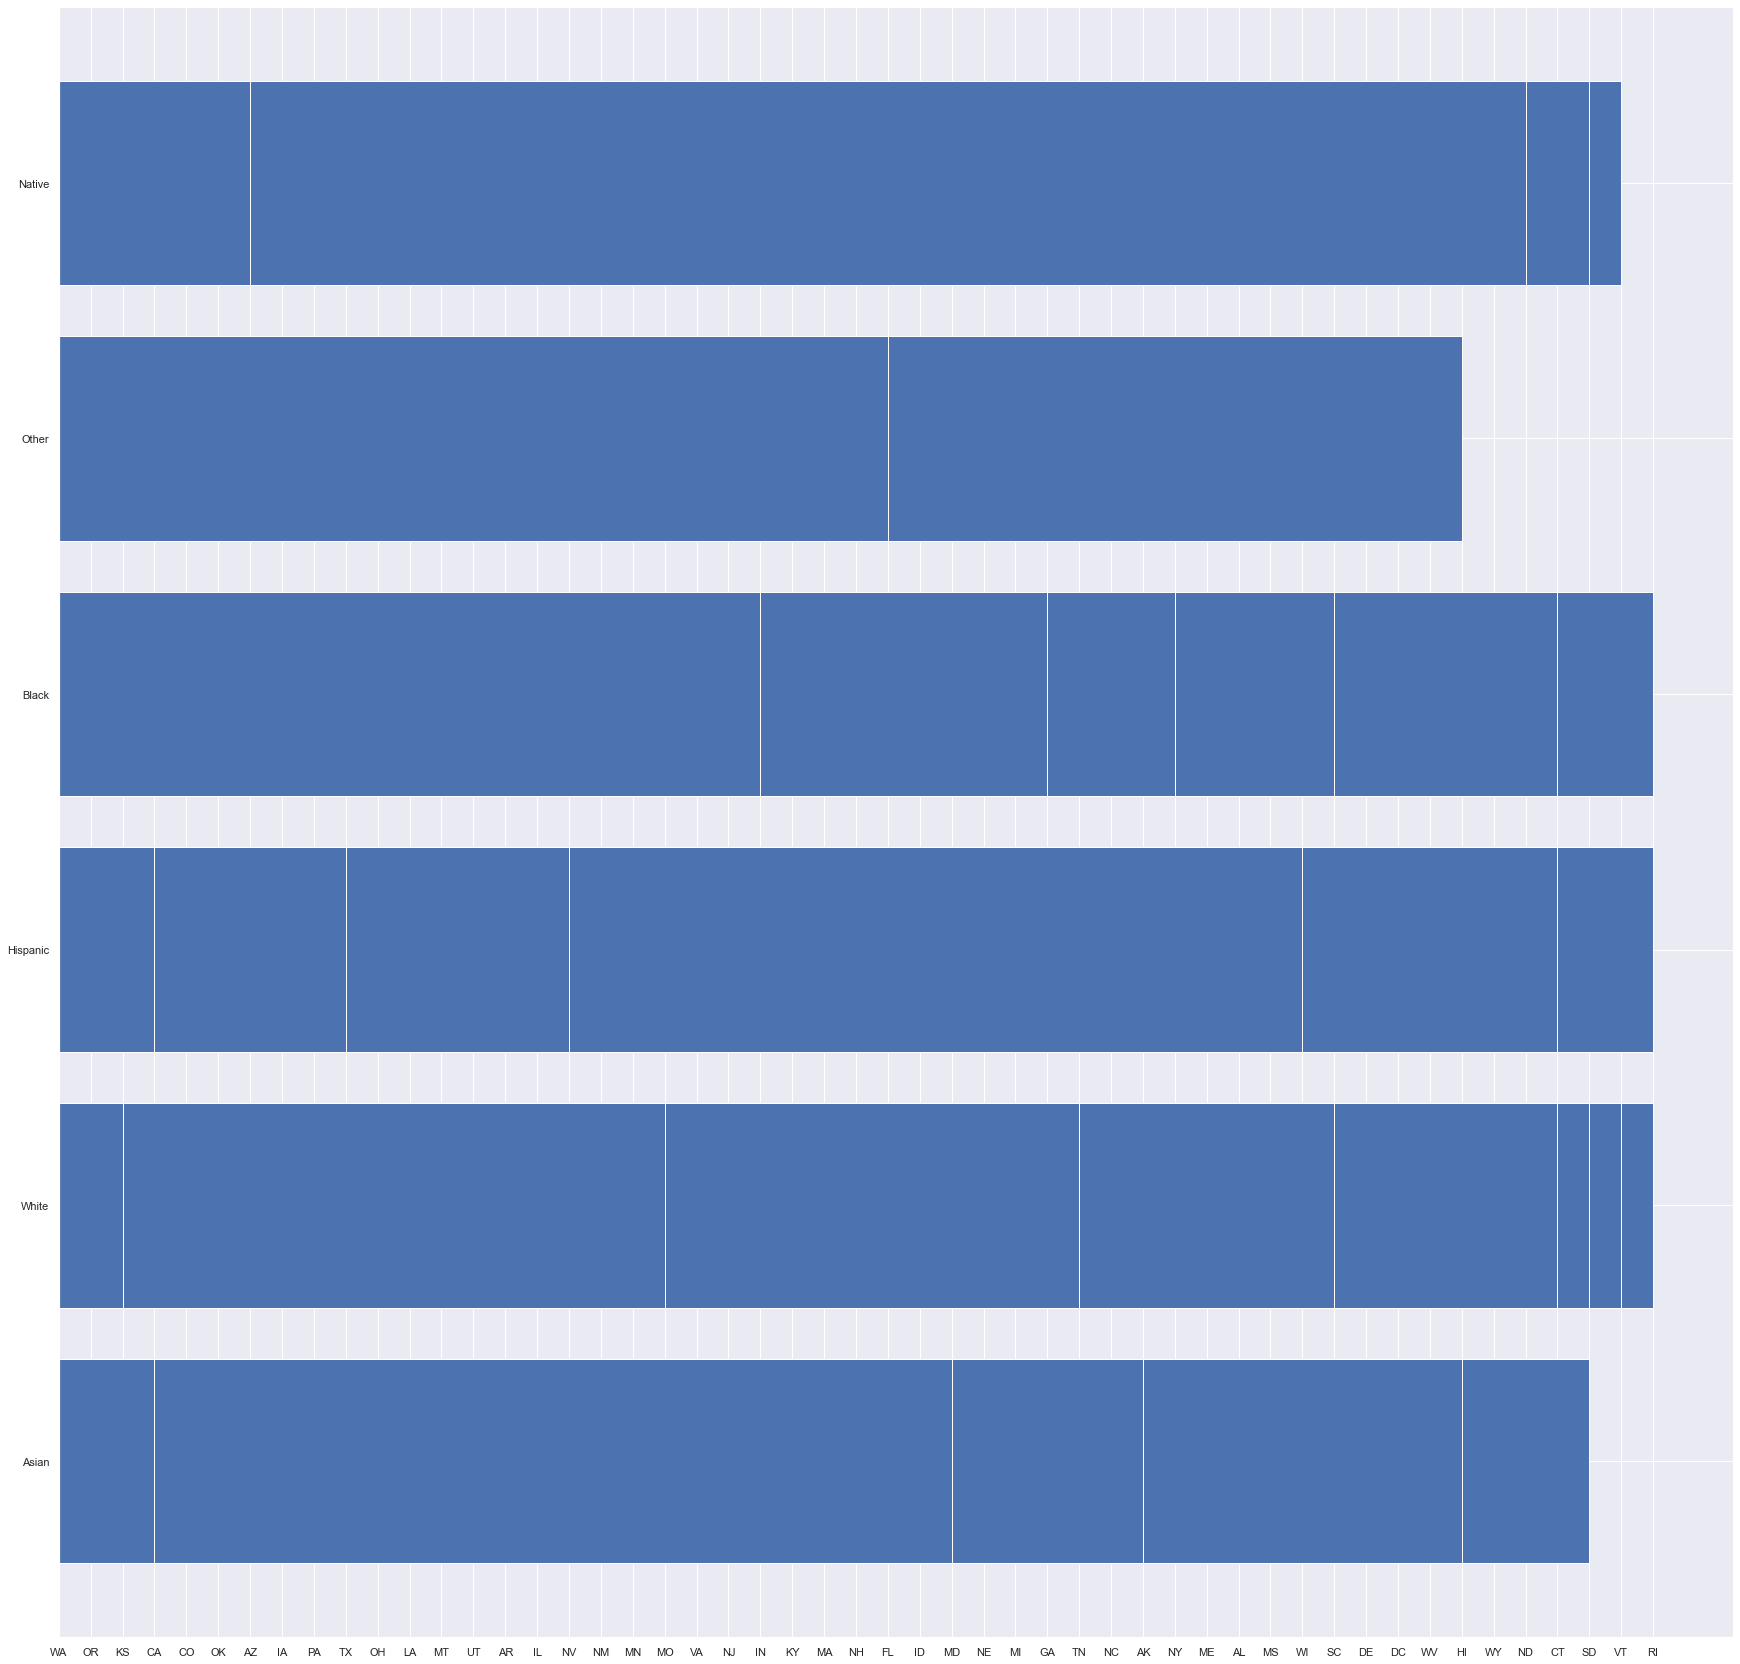

In [26]:
plt.figure(figsize=(30,30))
plt.barh(df['race'],df['state'])

In [27]:
# Analysing dataset and saving to html file
analyze_report = sv.analyze(df)
analyze_report.show_html('shootings_analysis.html', open_browser = False)

                                             |                                             | [  0%]   00:00 ->…

Report shootings_analysis.html was generated.



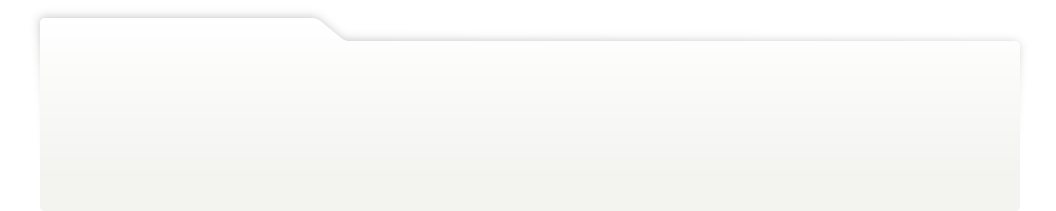
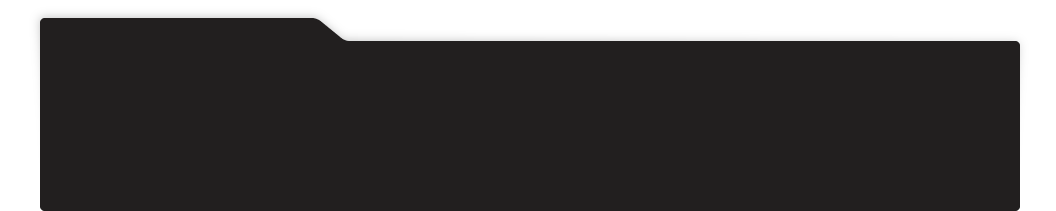
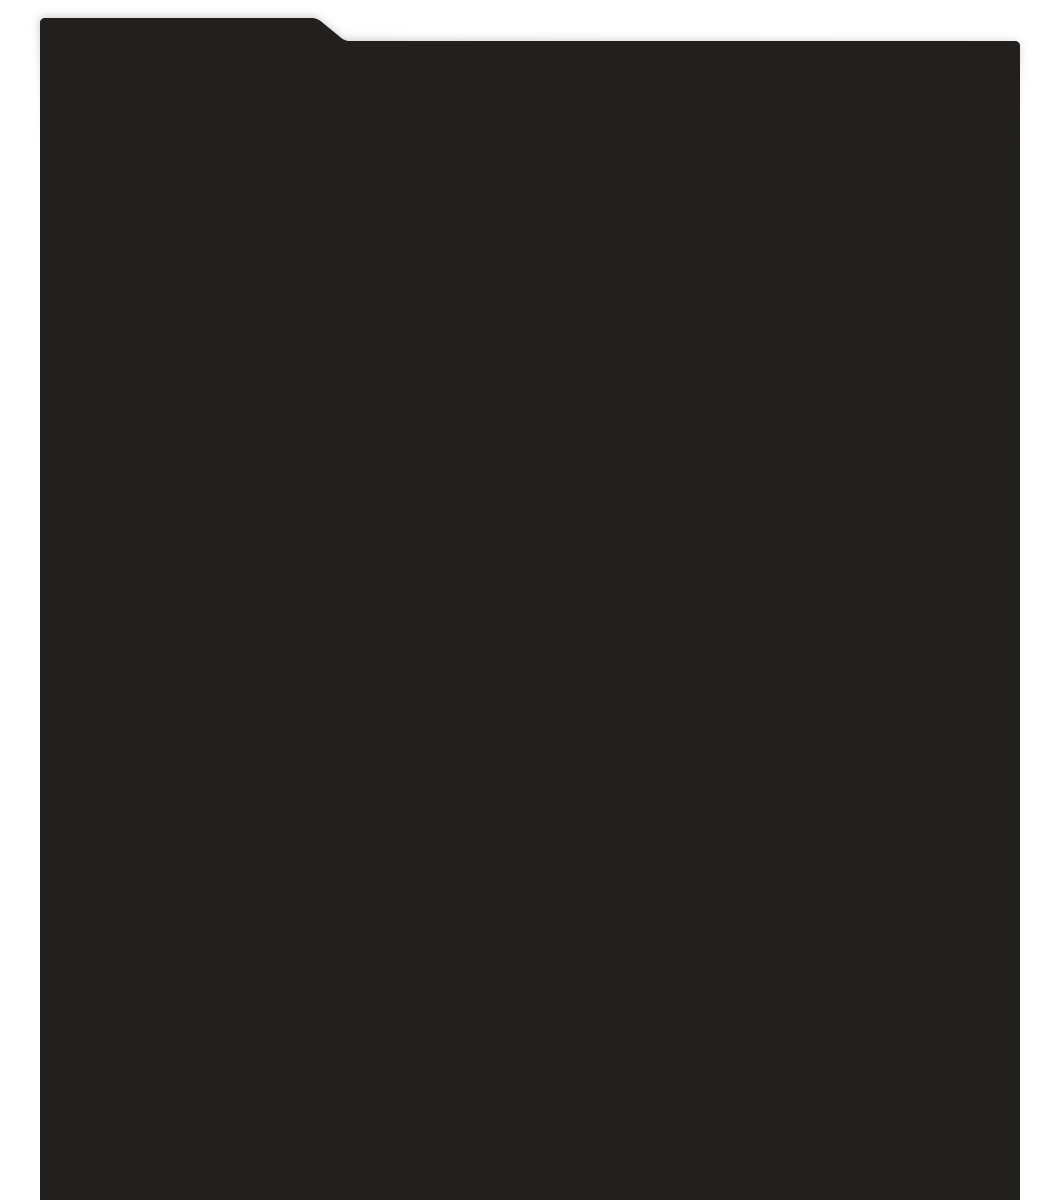
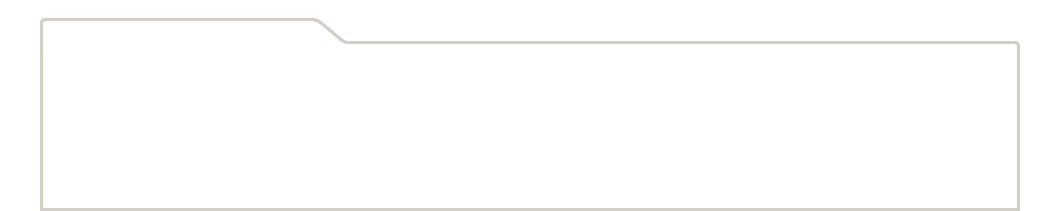
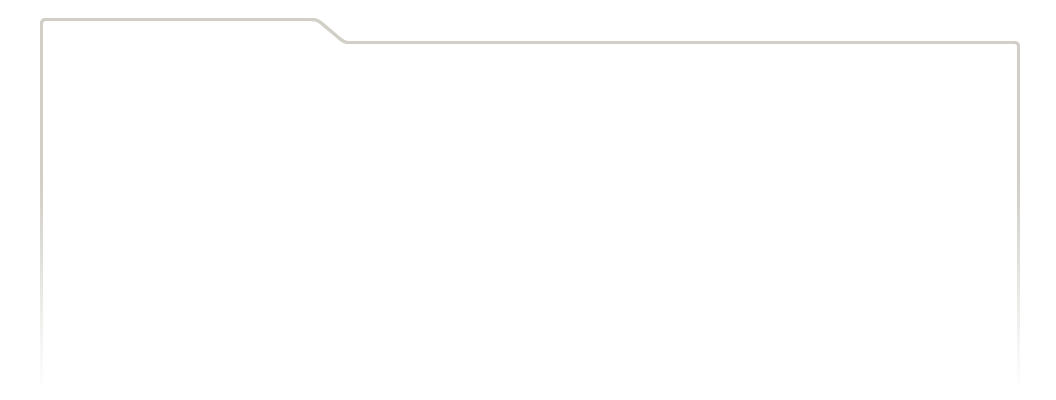
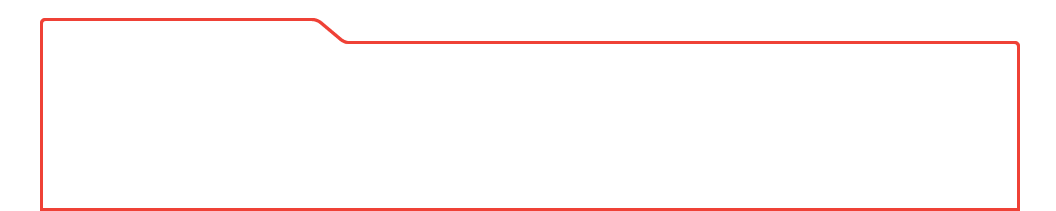
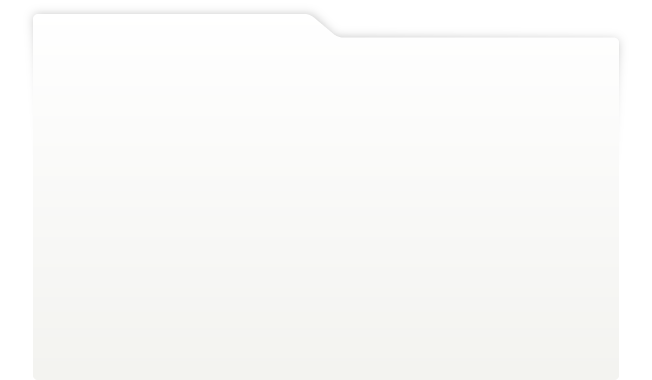
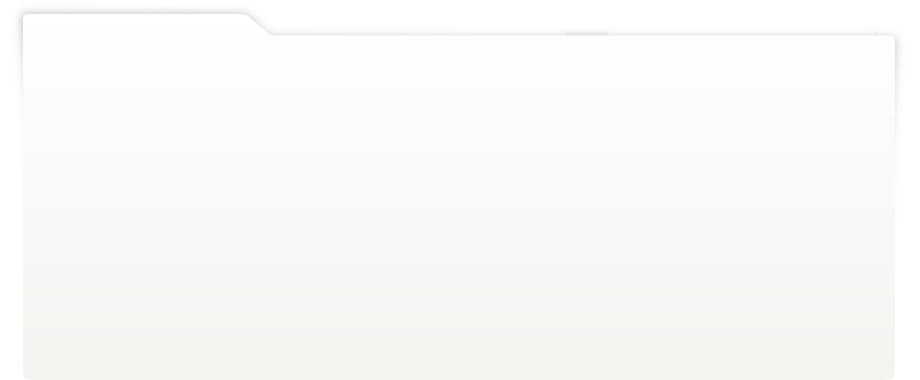
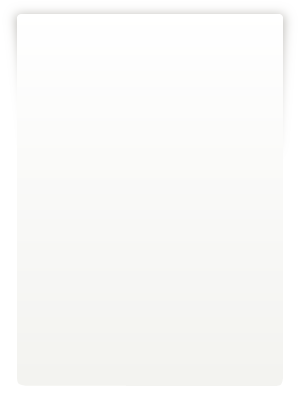
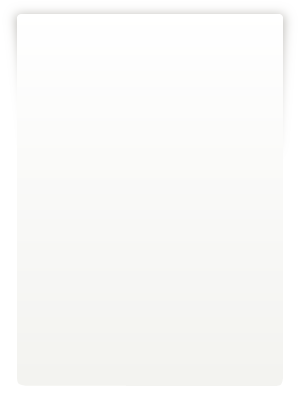
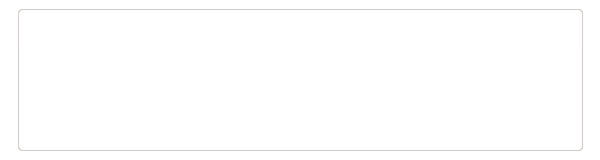
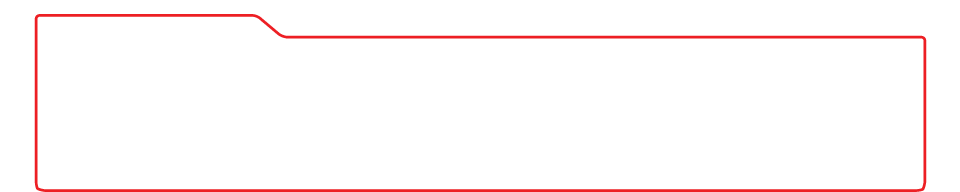
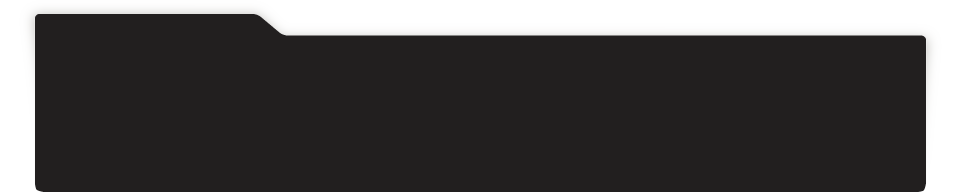
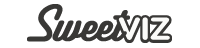
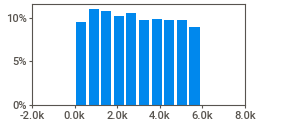
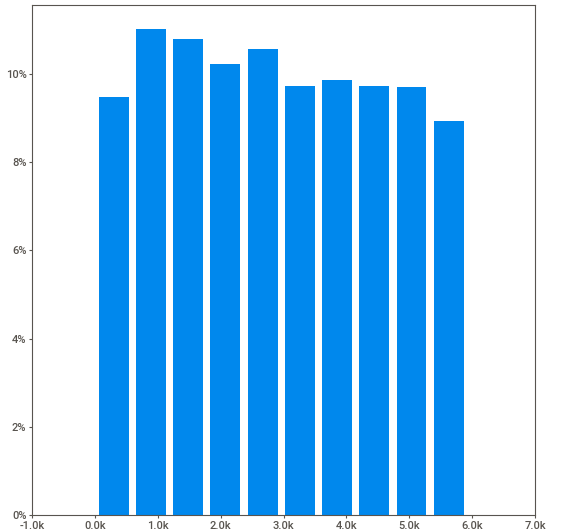
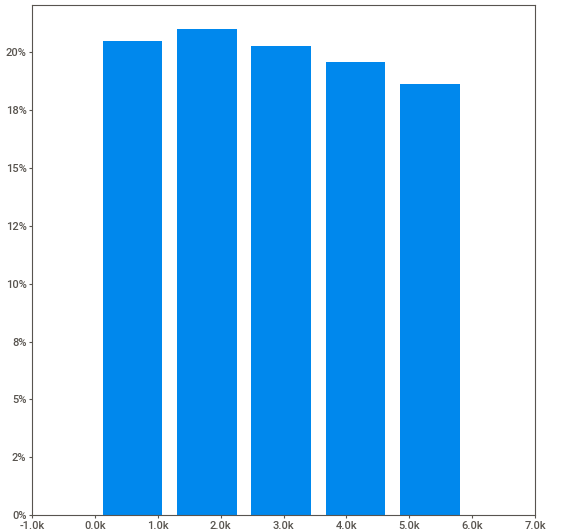
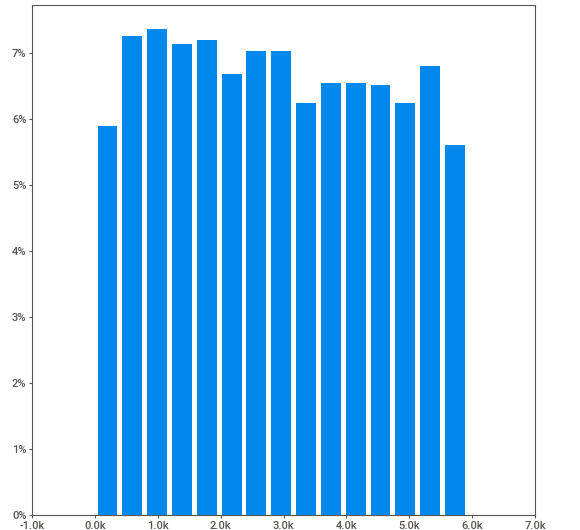
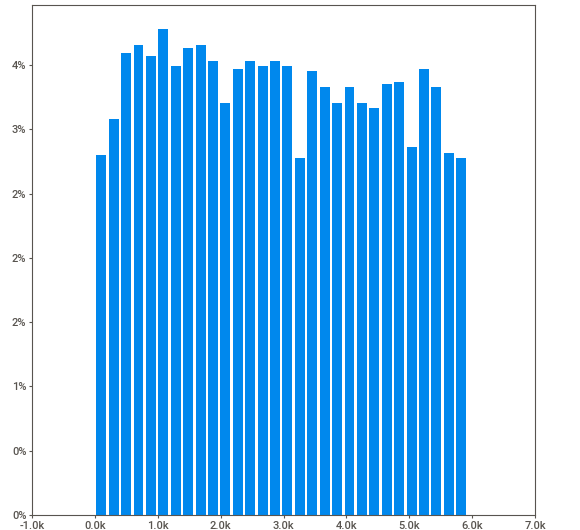
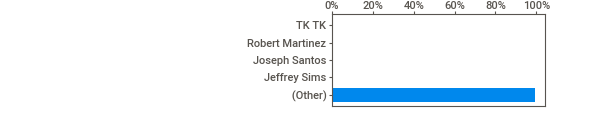
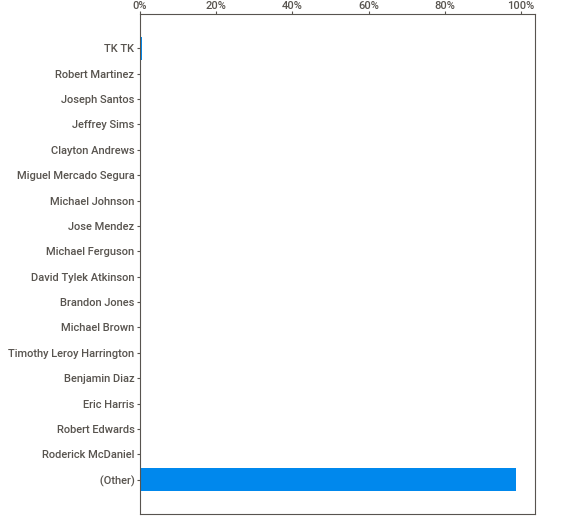
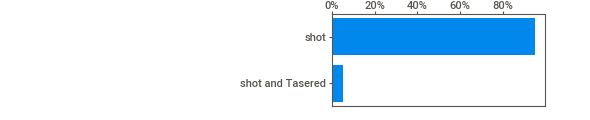
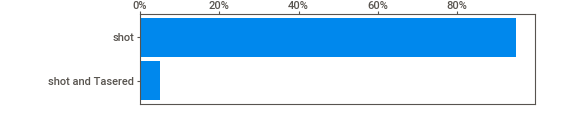
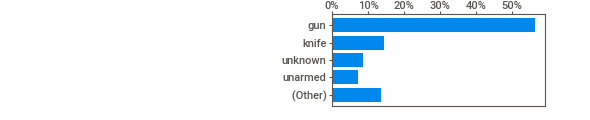
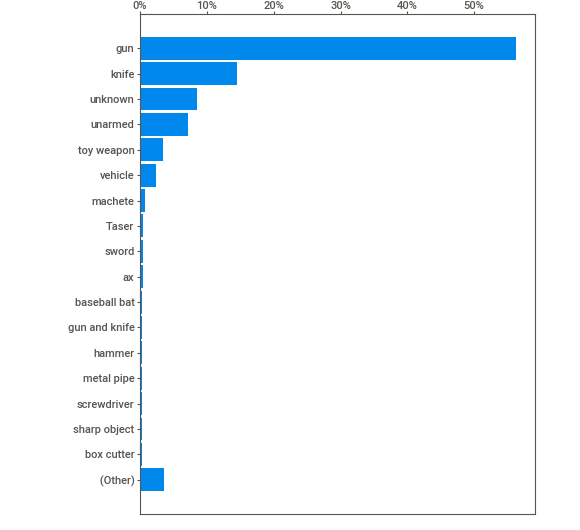
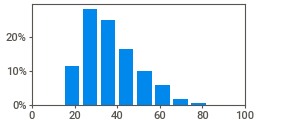
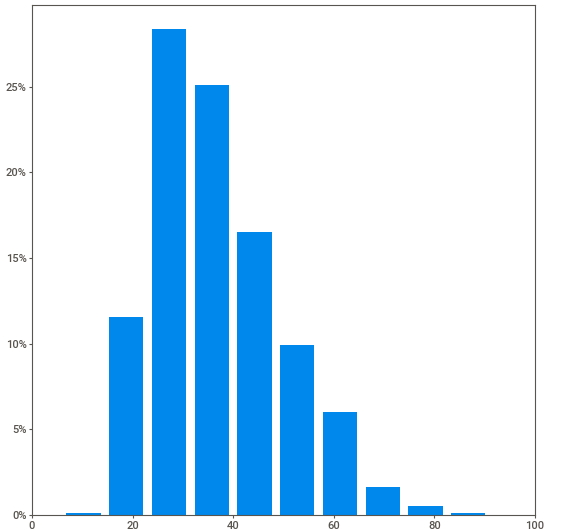
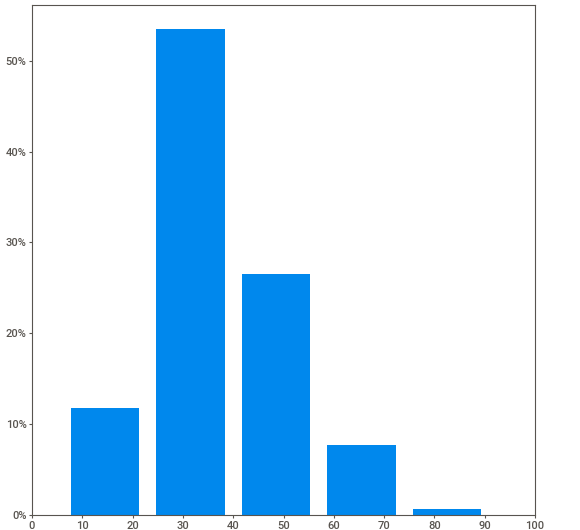
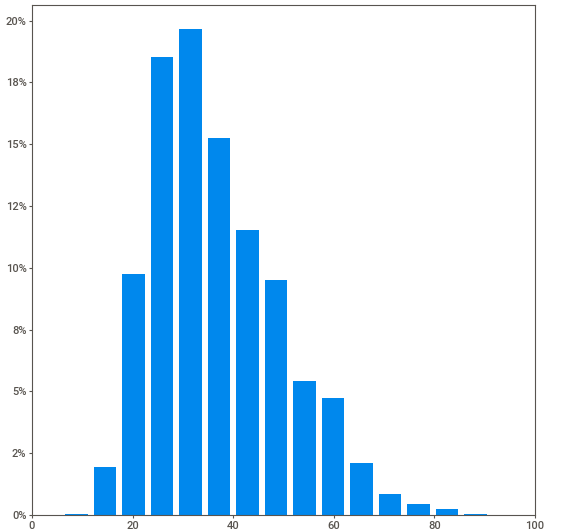
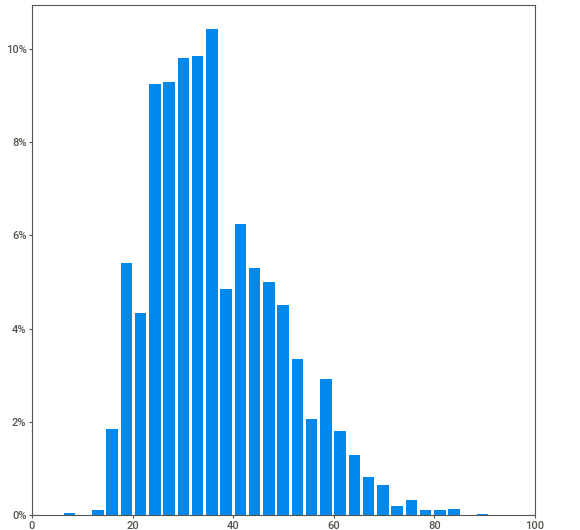
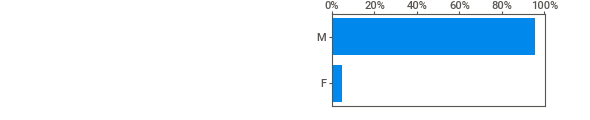
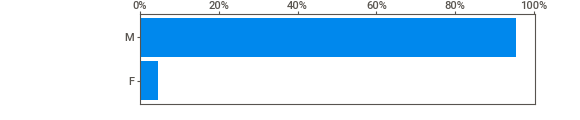
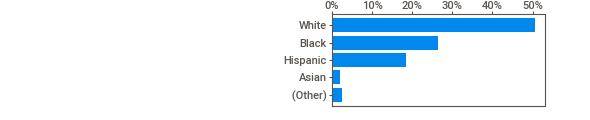
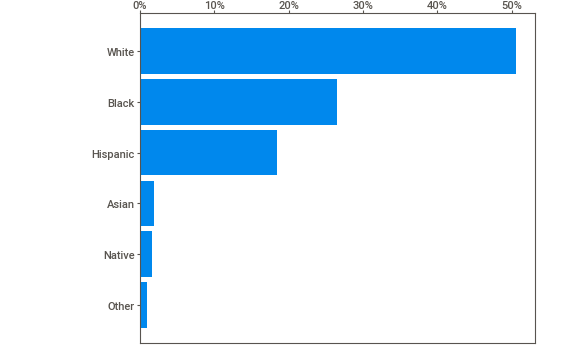
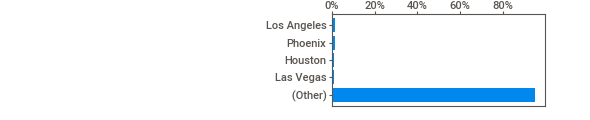
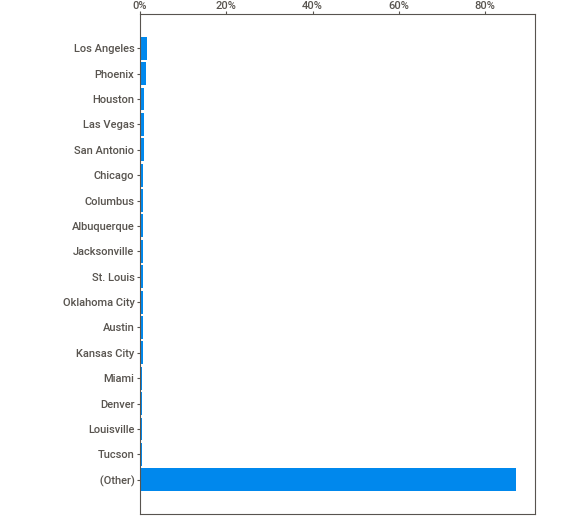
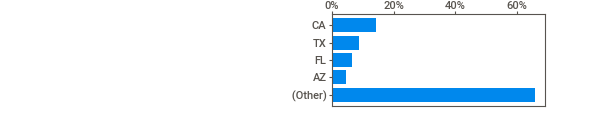
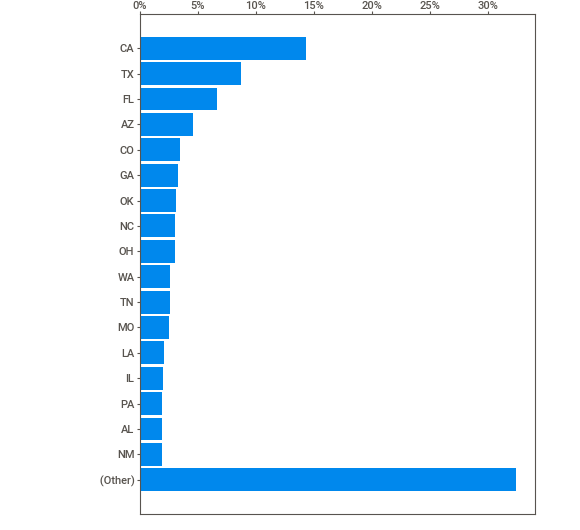
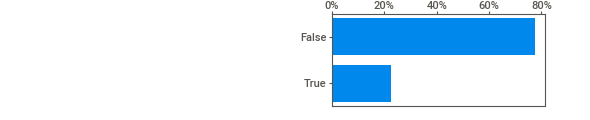
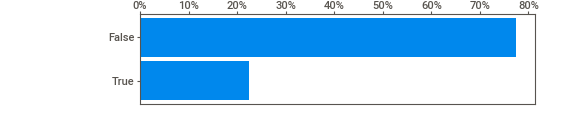
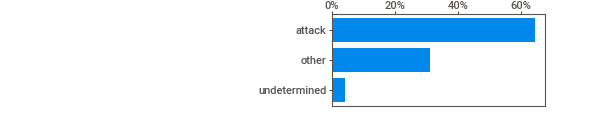
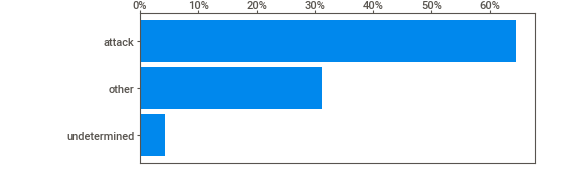
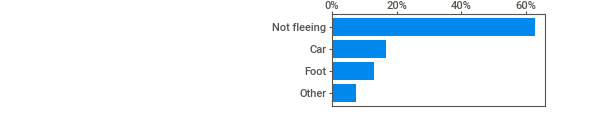
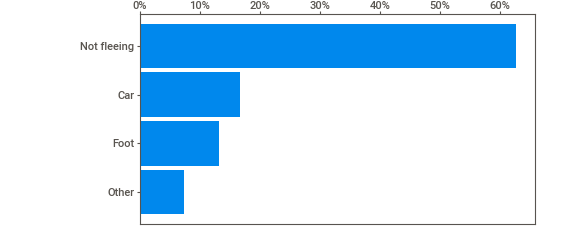
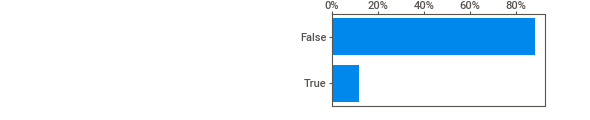
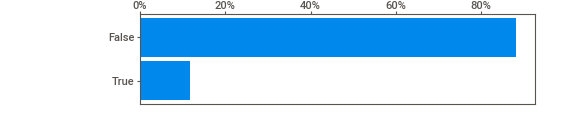
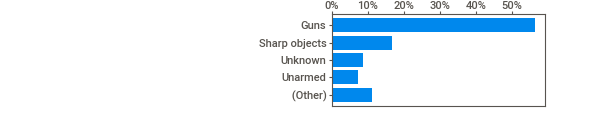
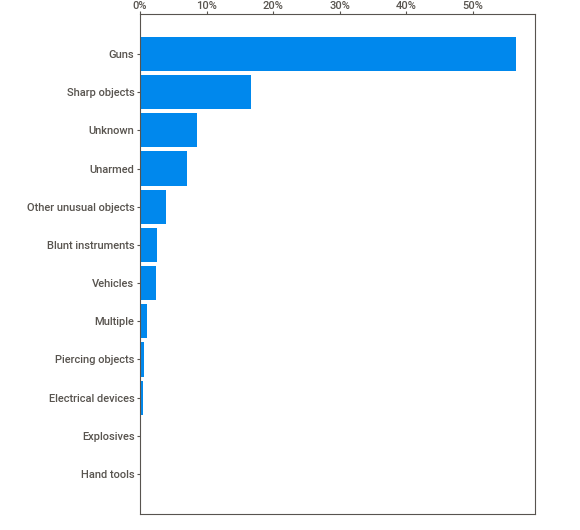
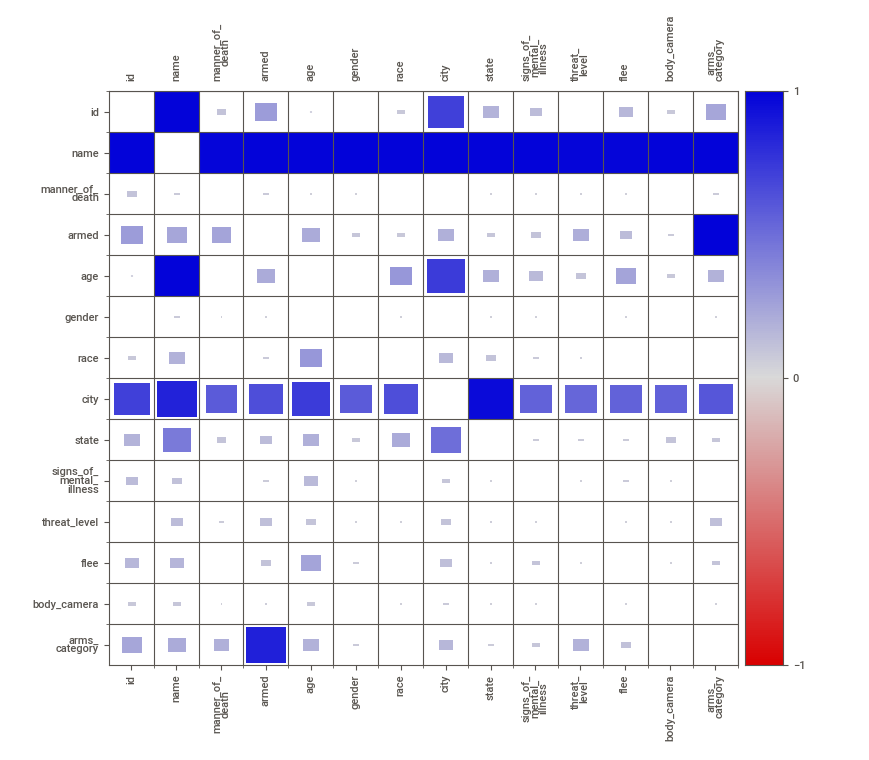
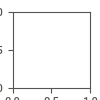

In [28]:
# displaying analysis 
IPython.display.HTML('shootings_analysis.html')

In [29]:
# Training and testing model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4593,5435,1/27/2020,shot,gun,22.0,M,Black,Aiken,SC,False,attack,Not fleeing,False,Guns
3451,4050,9/20/2018,shot,gun,55.0,M,White,Honolulu,HI,False,attack,Not fleeing,False,Guns
2596,3019,10/5/2017,shot,knife,31.0,M,Hispanic,Brownsville,TX,False,attack,Not fleeing,False,Sharp objects
1477,1707,7/12/2016,shot,hatchet,23.0,M,White,Anchorage,AK,True,attack,Not fleeing,False,Blunt instruments
3824,4679,3/5/2019,shot,unknown,31.0,M,White,Greenville,MS,True,undetermined,Other,False,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,2367,2/21/2017,shot,gun,25.0,M,Hispanic,Ogden,UT,False,attack,Not fleeing,True,Guns
4163,4924,8/1/2019,shot,gun,36.0,M,White,Charleston,WV,False,attack,Other,False,Guns
1045,1219,2/1/2016,shot,toy weapon,36.0,M,Black,Washington,DC,False,attack,Foot,False,Other unusual objects
1279,1492,4/26/2016,shot,gun,24.0,F,White,Albuquerque,NM,True,attack,Car,False,Guns


In [30]:
x_test

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3416,4001,8/29/2018,shot,vehicle,17.0,M,Black,Houston,TX,False,attack,Car,False,Vehicles
4888,5914,6/11/2020,shot,gun,26.0,M,White,Paso Robles,CA,True,attack,Foot,False,Guns
749,907,10/11/2015,shot,machete,43.0,M,Hispanic,West Odessa,TX,False,other,Car,False,Sharp objects
2429,2818,7/29/2017,shot,gun,48.0,M,White,Melba,ID,False,attack,Car,False,Guns
2907,3415,2/14/2018,shot,gun,27.0,M,White,Belton,MO,True,attack,Other,False,Guns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,5873,5/23/2020,shot,unarmed,28.0,M,Black,Bass River,NJ,False,other,Not fleeing,False,Unarmed
1186,1394,3/20/2016,shot,toy weapon,16.0,M,Black,Gainesville,FL,True,other,Not fleeing,False,Other unusual objects
2333,2695,6/25/2017,shot,gun,24.0,M,Black,Oklahoma City,OK,False,attack,Not fleeing,True,Guns
3263,3808,6/29/2018,shot,gun,36.0,M,Hispanic,Aurora,CO,False,attack,Car,True,Guns


In [31]:
# Comparing dataset, train and test
compare_report = sv.compare([x_train, 'Train'], [x_test, 'Test'])
compare_report.show_html('shootings_comparison.html', open_browser = False)

                                             |                                             | [  0%]   00:00 ->…

Report shootings_comparison.html was generated.



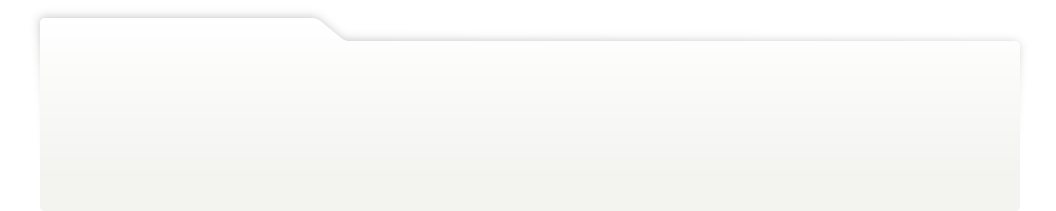
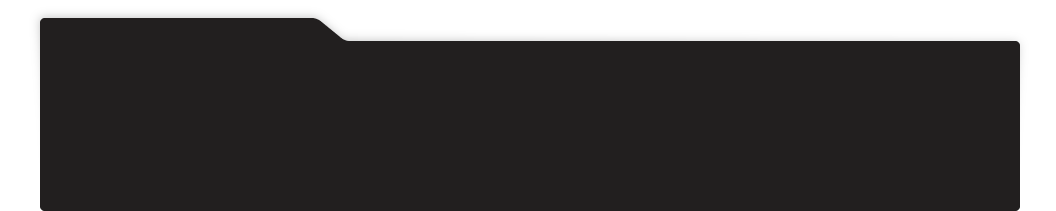
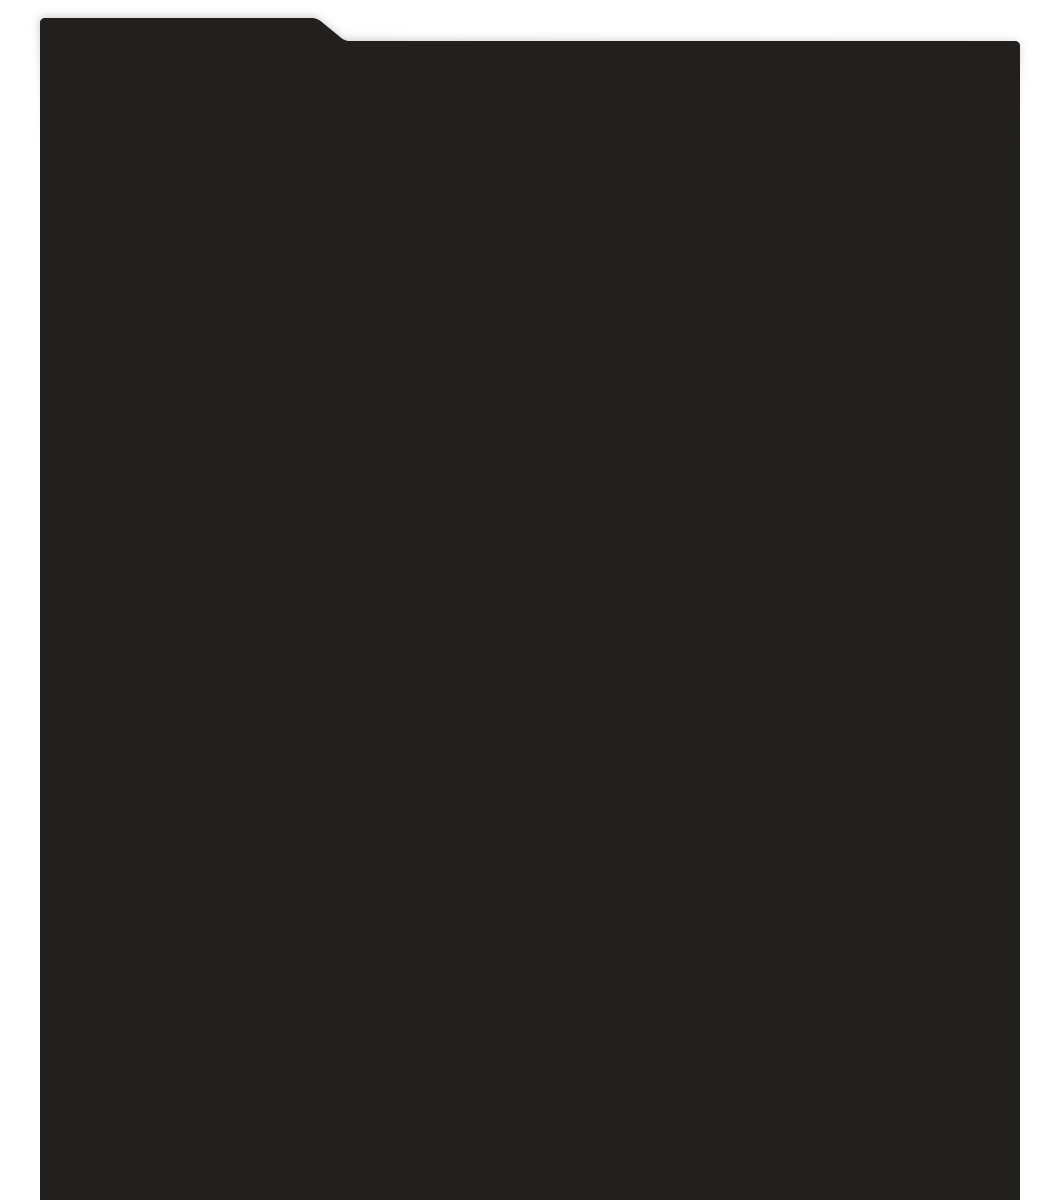
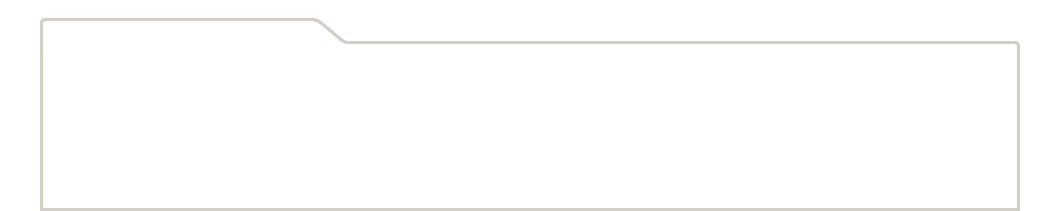
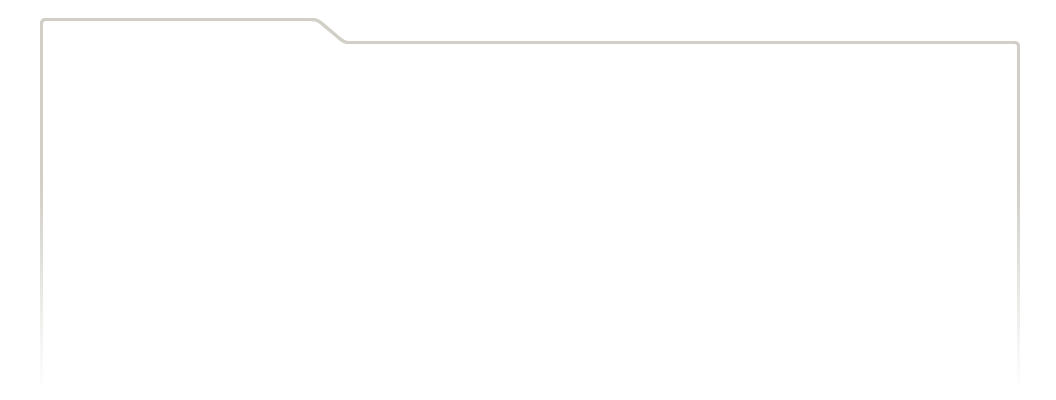
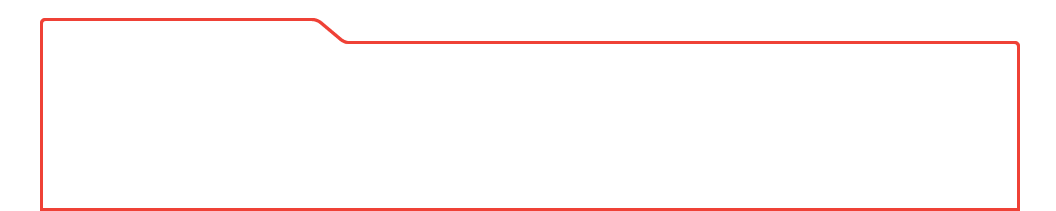
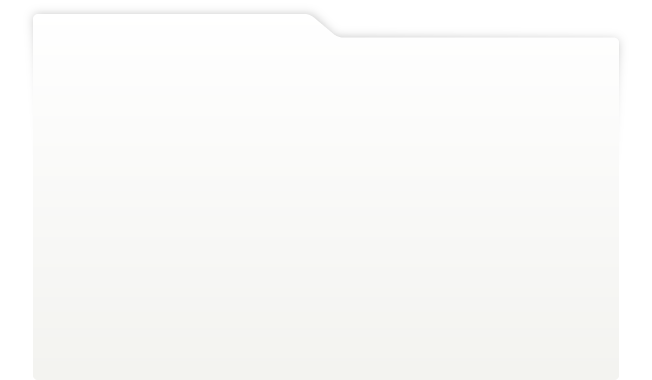
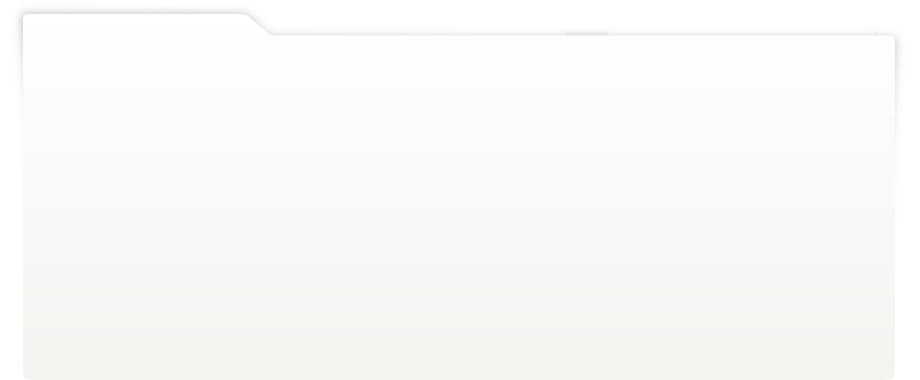
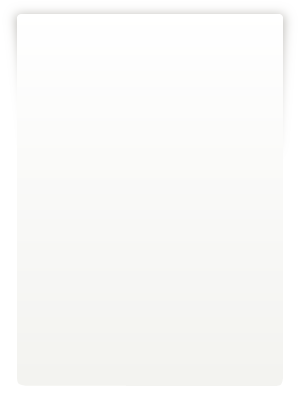
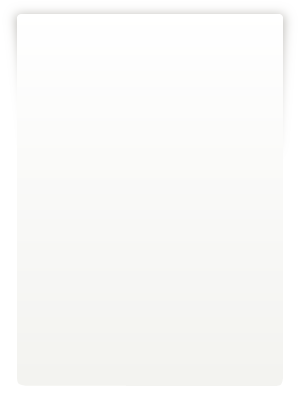
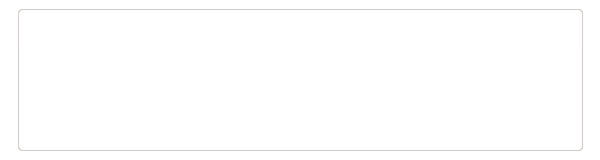
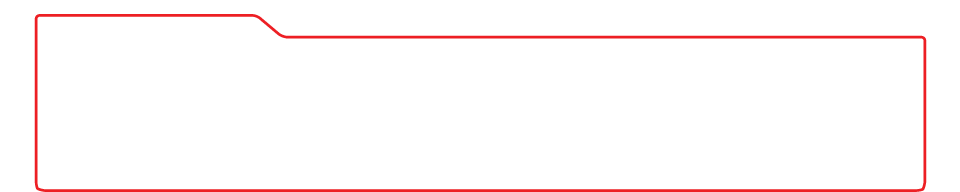
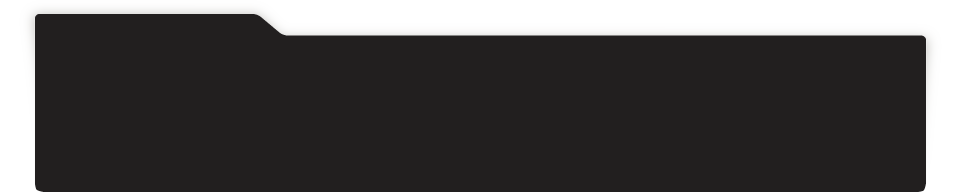
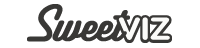
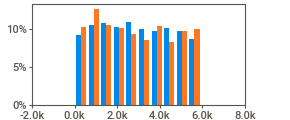
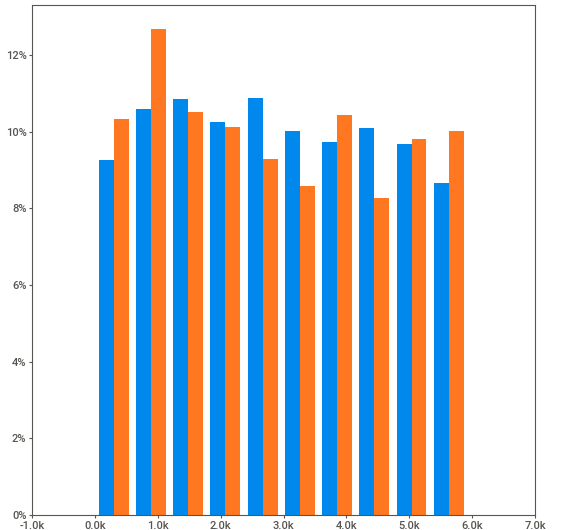
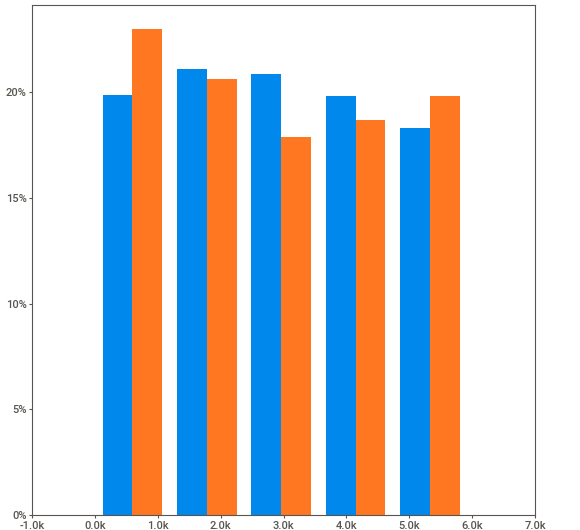
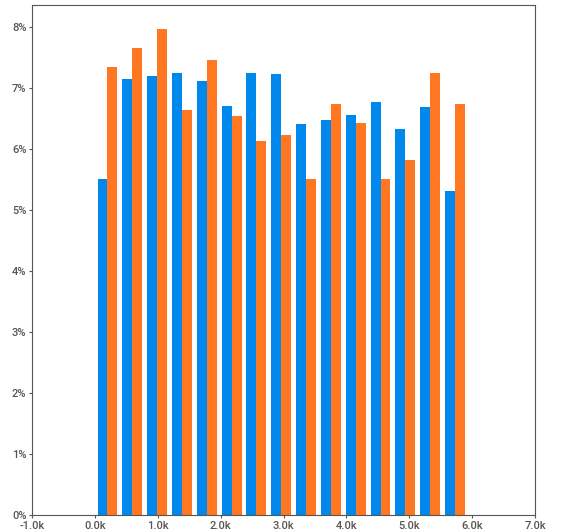
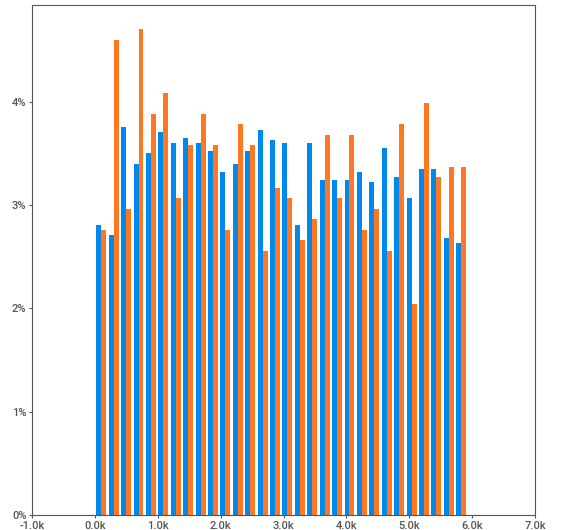
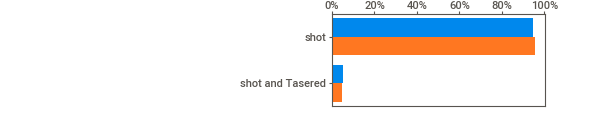
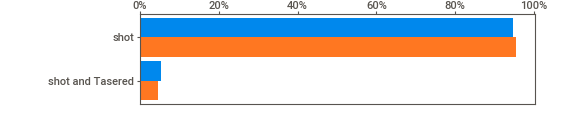
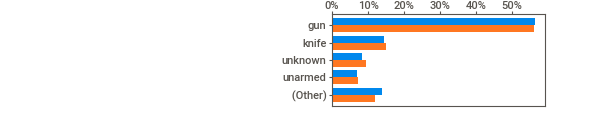
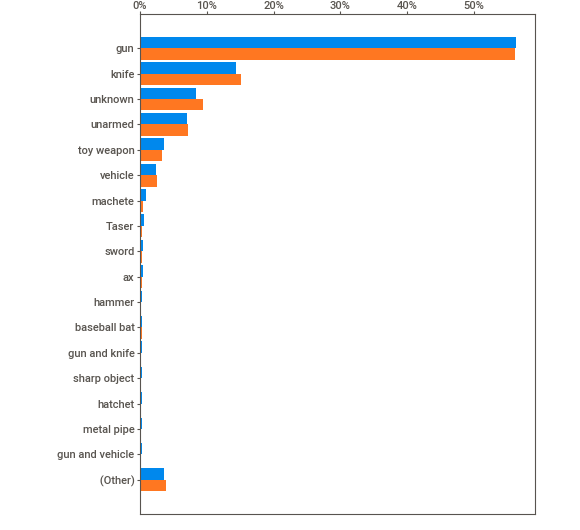
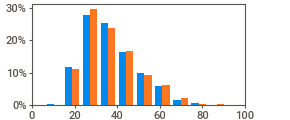
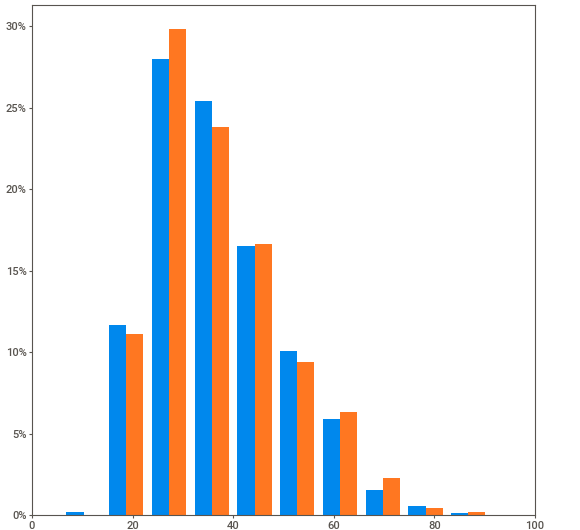
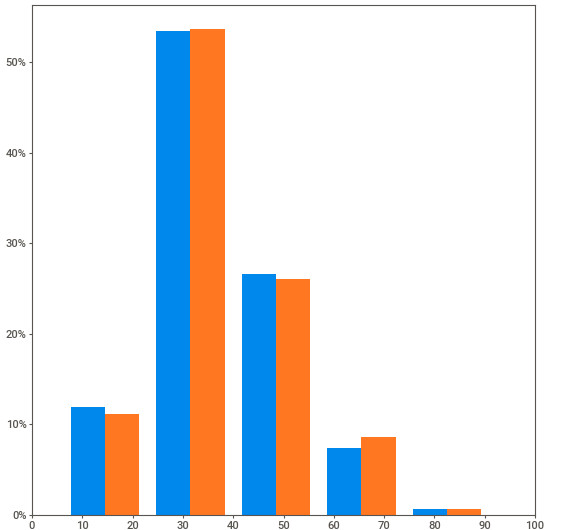
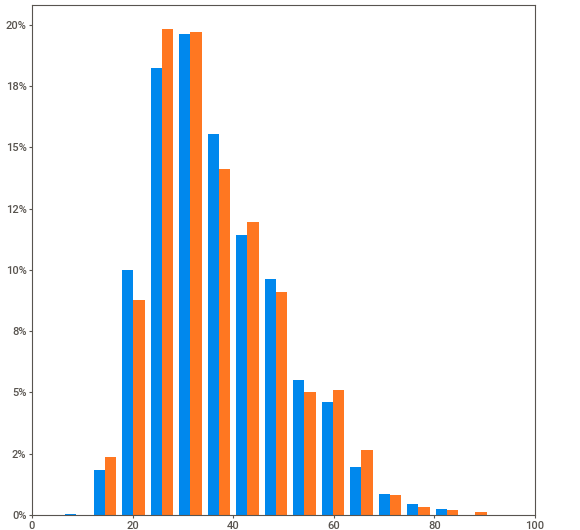
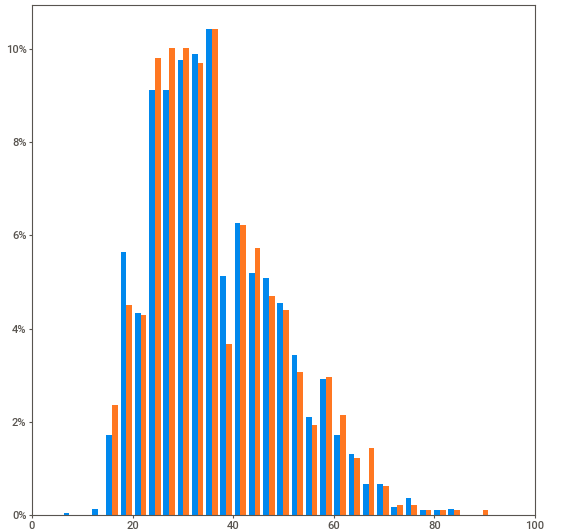
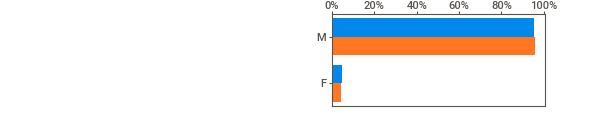
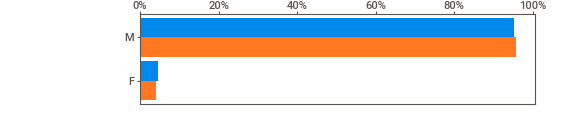
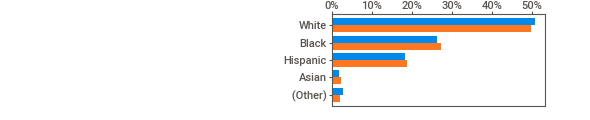
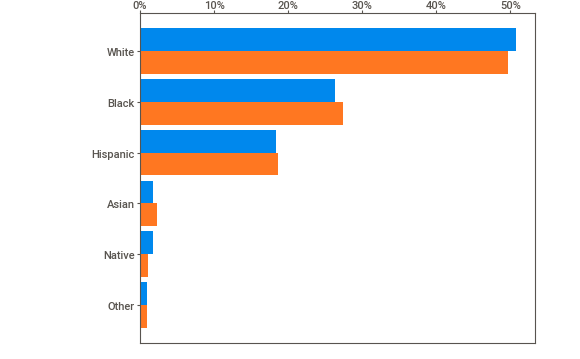
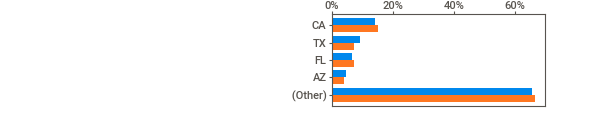
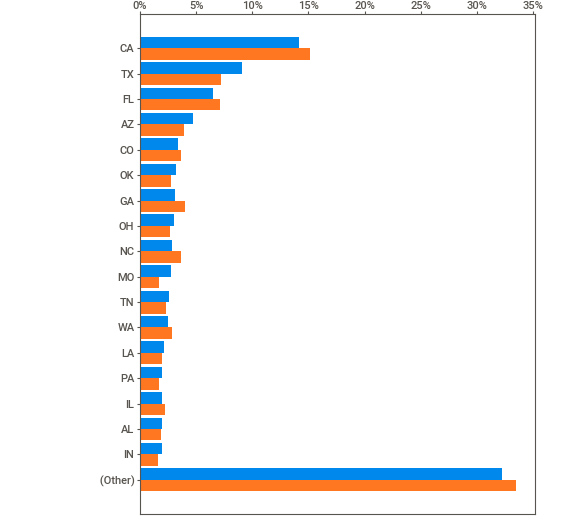
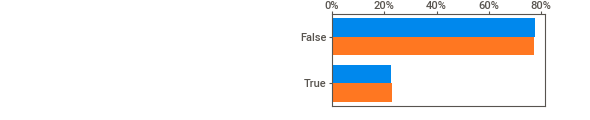
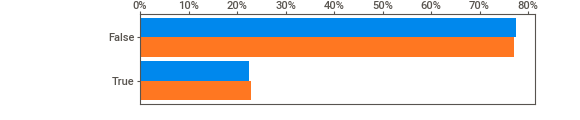
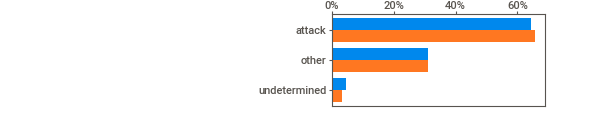
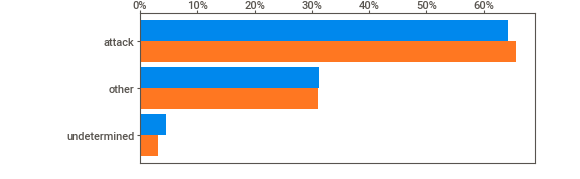
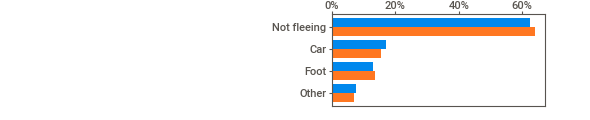
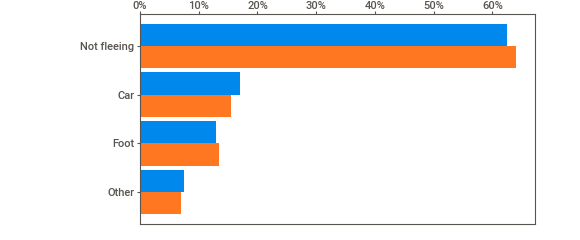
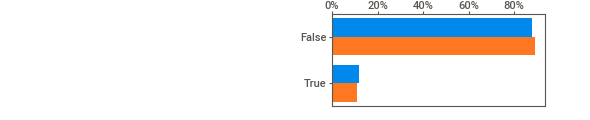
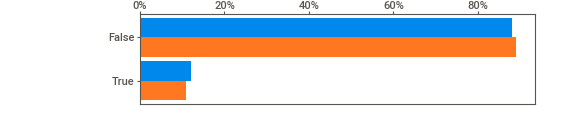
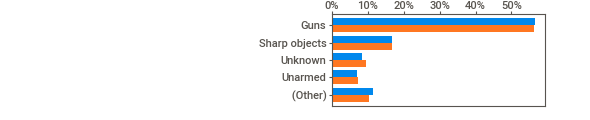
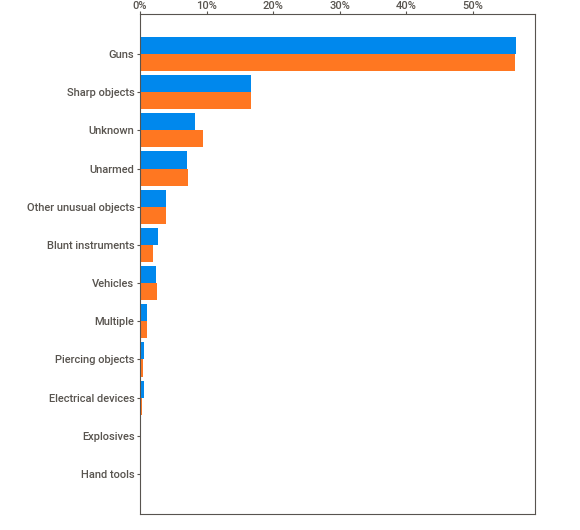
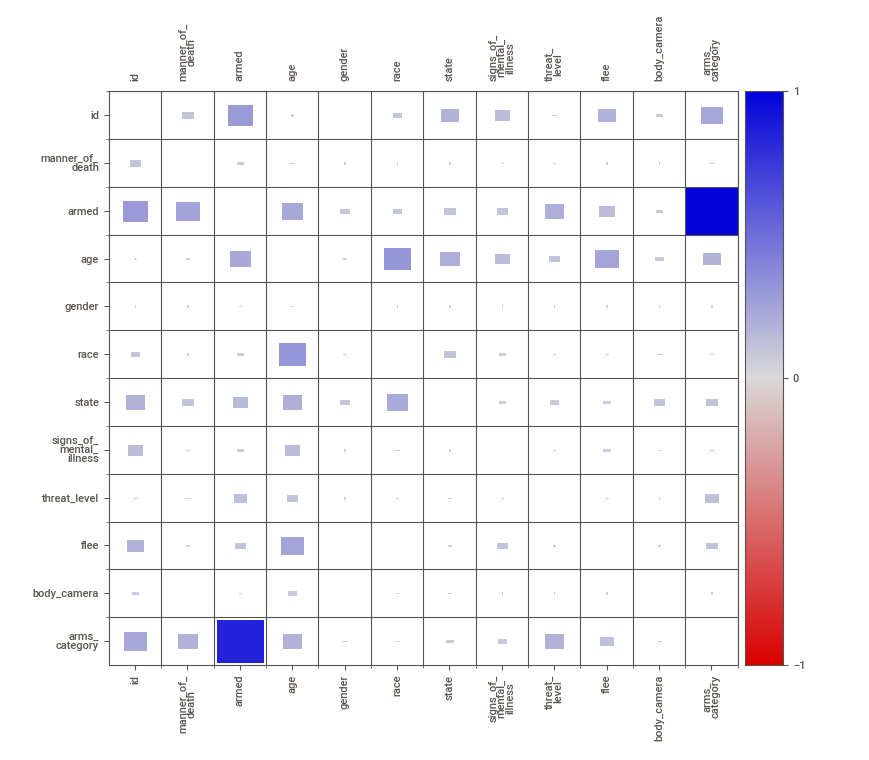
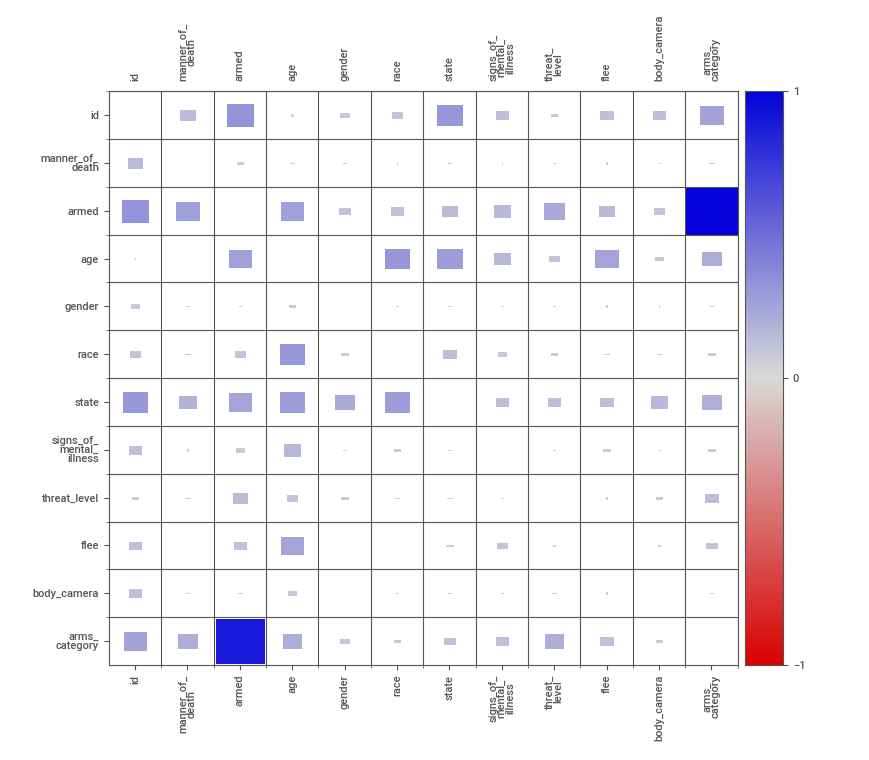

In [32]:
IPython.display.HTML('shootings_comparison.html')

In [33]:
#summary stats table transposed for df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4895.0,2902.148519,1683.467910,3.0,1441.5,2847.0,4352.5,5925.0
age,4895.0,36.547702,12.694266,6.0,27.0,35.0,45.0,91.0


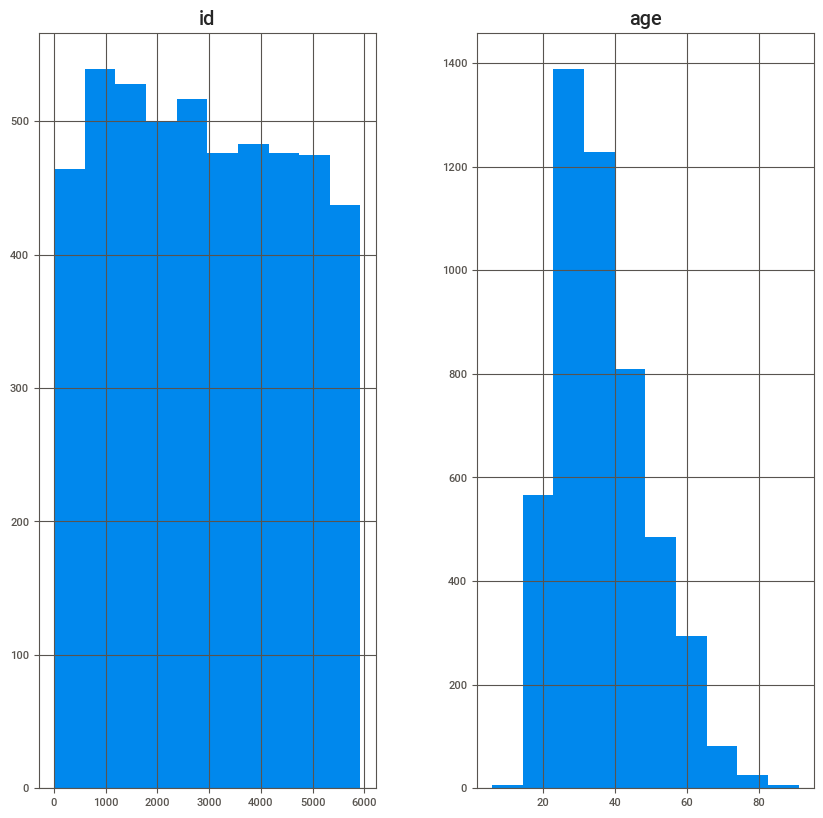

In [34]:
hist = df.hist(bins=10,figsize =(10,10))

In [45]:
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show(df)

To check: Unique count of non-numeric data
name               4851
manner_of_death       2
armed                89
gender                2
race                  6
city               2288
state                51
threat_level          3
flee                  4
arms_category        12
dtype: int64
Top 5 unique values of name
              name  Count
0            TK TK     29
1  Robert Martinez      2
2    Joseph Santos      2
3     Jeffrey Sims      2
4  Clayton Andrews      2
 
Top 5 unique values of date
        date  Count
0  6/29/2018      9
1   1/6/2018      9
2   4/1/2018      9
3  3/12/2018      8
4  1/27/2016      8
 
Top 5 unique values of manner_of_death
    manner_of_death  Count
0              shot   4647
1  shot and Tasered    248
 
Top 5 unique values of armed
        armed  Count
0         gun   2755
1       knife    708
2     unknown    418
3     unarmed    348
4  toy weapon    171
 
Top 5 unique values of gender
  gender  Count
0      M   4673
1      F    222
 
Top 5 uni

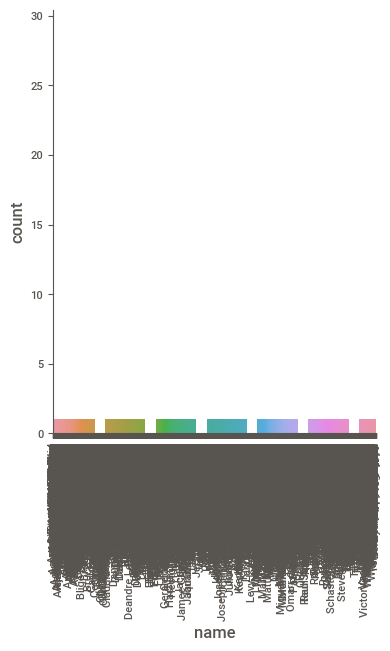

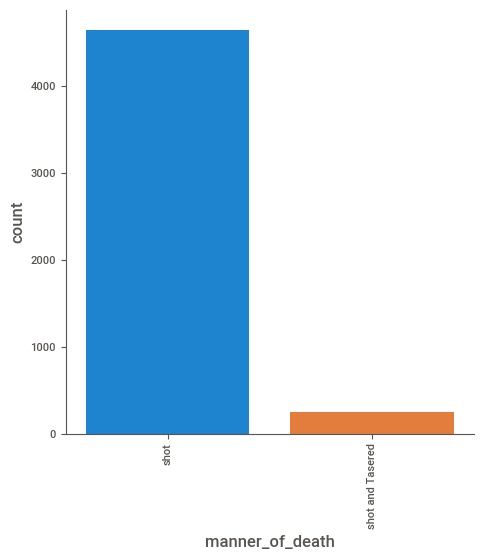

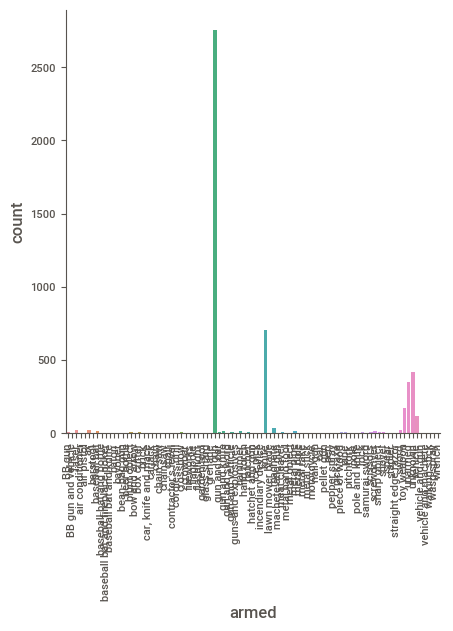

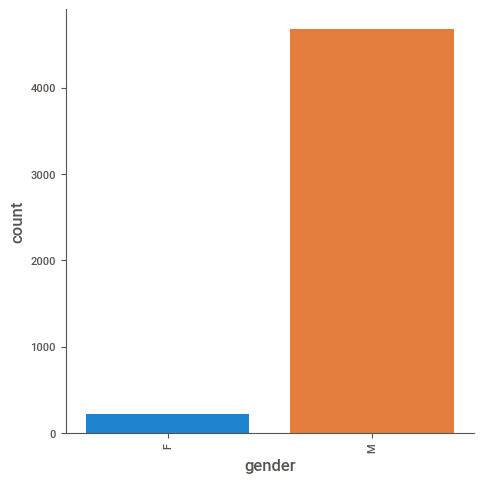

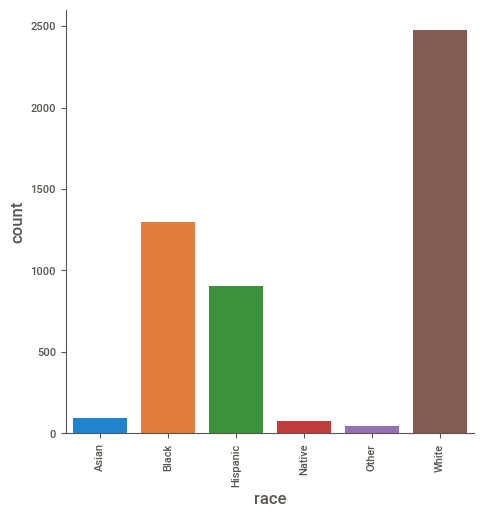

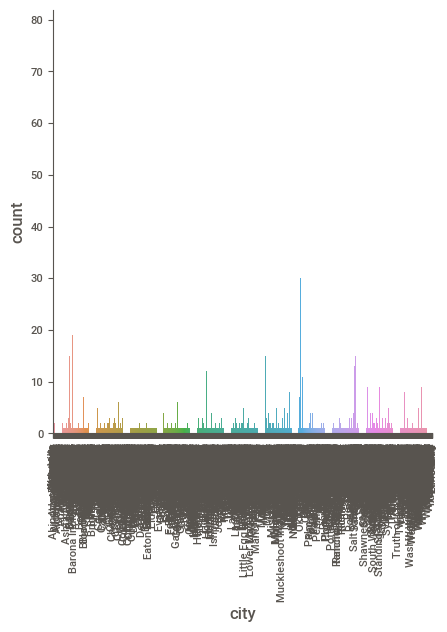

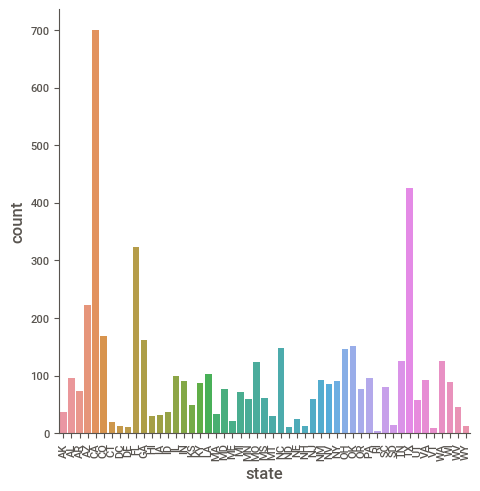

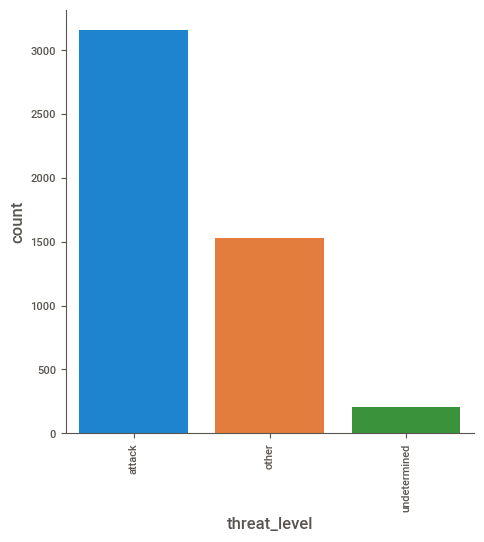

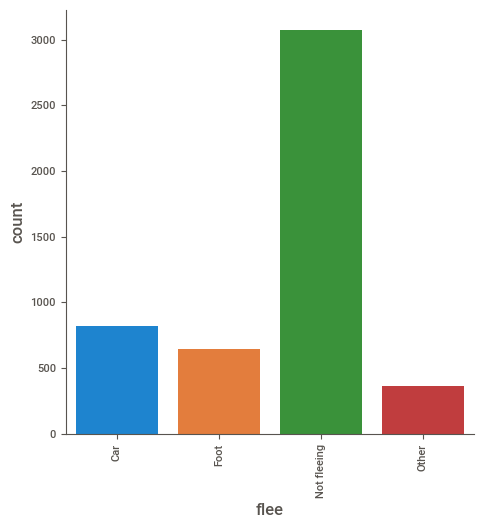

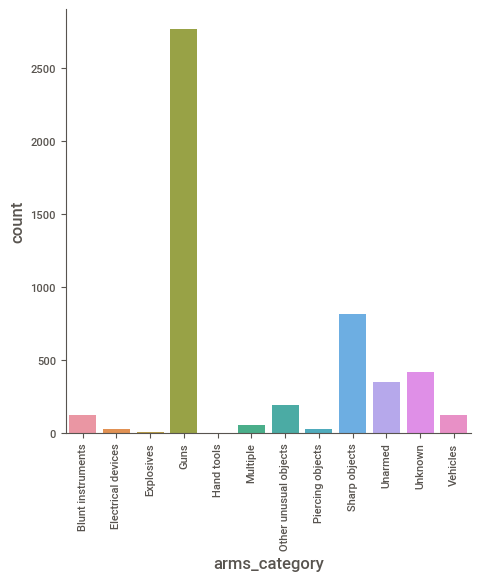

In [44]:
categorical_eda(df)